# Example usage of **Barion** in jupyter notebook

In [1]:
from particle import *
from ui_interface import *
from amedata import *
from ring import Ring
from chartplot import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#%matplotlib osx

#### Initialize environment

In [2]:
ame_data = AMEData(DummyIFace())
chart_plot = ChartPlot()

AME Database files are available.


#### Make a reference particle

In [3]:
p = Particle(6, 6, ame_data, Ring('ESR', 108.5))
p.qq = 3
p.ke_u = 422
p.path_length_m = 108.5
p.f_analysis_mhz = 245
p.i_beam_uA = 1.2

In [4]:
# do some calculations
p.get_magnetic_rigidity()

13.101263919482344

In [5]:
for pp in p.get_isobars():
    print(pp)

12-Li 3+, Z: 3, N: 9
12-Be 4+, Z: 4, N: 8
12-B 5+, Z: 5, N: 7
12-C 6+, Z: 6, N: 6
12-N 7+, Z: 7, N: 5
12-O 8+, Z: 8, N: 4


#### Make some nuclidic chart plots

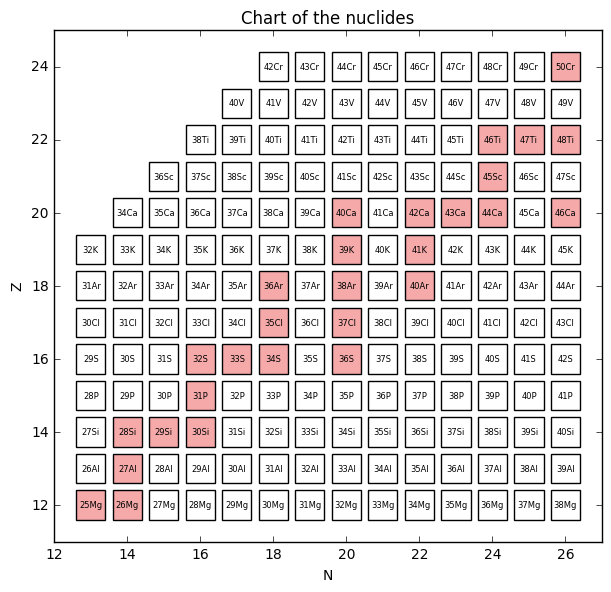

In [6]:
# get some nuclides
some_nuclides = p.get_nuclides(12, 24, 13, 26, 1)

# color them according to some criterion
for pp in some_nuclides:
    if pp.get_lifetime() == 'stbl':
        pp.chart_fill_color = Particle.FILL_COLOR_STABLE
        
# plot them
chart_plot.bulk_plot(some_nuclides)

#### Plot some quantities

In [7]:
# Get some nuclides
some_nuclides = np.array([])
for pp in p.get_nuclides(0, 82, 0, 126, 1):
    info = [pp.tbl_aa, pp.tbl_binen_kev]
    some_nuclides = np.append(some_nuclides, info)
    
some_nuclides = np.reshape(some_nuclides, (int(np.shape(some_nuclides)[0]/2), 2))

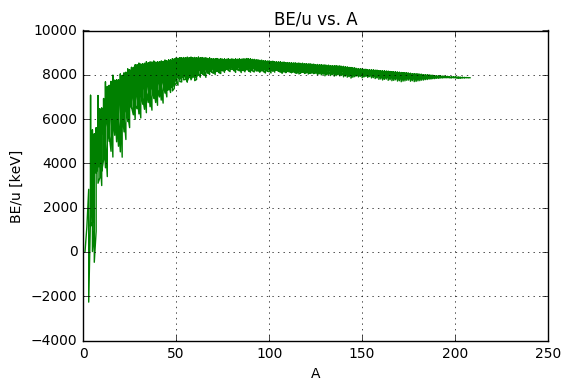

In [8]:
# plot the quantity
plt.plot(some_nuclides[:,0], some_nuclides[:,1], 'g')
plt.grid()
plt.title('BE/u vs. A')
plt.xlabel('A')
plt.ylabel('BE/u [keV]')

#### Another plot example

In [9]:
# Get some nuclides
some_nuclides = np.array([])
for pp in p.get_nuclides(2, 40, 12, 36, 3):
    info = [pp.tbl_aa, pp.get_ionic_moq()]
    some_nuclides = np.append(some_nuclides, info)
    
some_nuclides = np.reshape(some_nuclides, (int(np.shape(some_nuclides)[0]/2), 2))

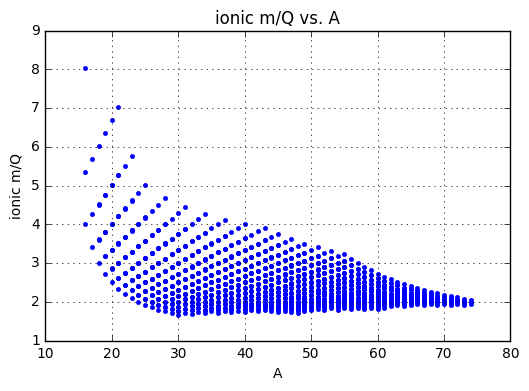

In [10]:
# plot the quantity
plt.plot(some_nuclides[:,0], some_nuclides[:,1], 'b.')
plt.grid()
plt.title('ionic m/Q vs. A')
plt.xlabel('A')
plt.ylabel('ionic m/Q')

#### Nuclide identification

In [11]:
res = p.identify(244.6, 244.7, 2, 2, 2, 0.01)
print(res)

Ring: ESR
gamma_t: 1
alpha_p: 1.0
mode: std
m/Q of the unknown particle: 3.9978163503294932

Candidates are: 


